In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from dateutil import relativedelta
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/victorvulovic/anaconda/envs/dsci6007/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['relativedelta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
col_names = ['customer_id','amount','date']
original_df = pd.read_csv('purchases.txt',delimiter='\t',names=col_names)
original_df.date = pd.to_datetime(original_df['date']) ## datetime
original_df['month'] = pd.DatetimeIndex(original_df['date']).month ## add in month
original_df['year'] = pd.DatetimeIndex(original_df['date']).year ## add in year
original_df.date = pd.DatetimeIndex(original_df['date'])
##days
start_date = datetime.datetime(2016,1,1)
original_df['days_since_purchase'] = start_date -original_df.date  ## days since last purchase for each purchase


In [3]:
#http://stackoverflow.com/questions/4039879/best-way-to-find-the-months-between-two-dates
def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [4]:
#Months
original_df['months_since_purchase']=original_df.date.apply(lambda x: diff_month(start_date,x))
#Year
original_df['years_since_purchase']=original_df.date.apply(lambda x: diff_year(start_date,x))


In [5]:
## Get quarters (three months = 1 quarter)
original_df['quarters_since_purchase'] = round(original_df.months_since_purchase/3)

TypeError: cannot convert the series to <type 'float'>

In [37]:
original_df['date'][0] - start_date

Timedelta('-2247 days +00:00:00')

In [6]:
original_df.head(15)

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase
0,760,25.0,2009-11-06,11,2009,2247 days,74,7
1,860,50.0,2012-09-28,9,2012,1190 days,40,4
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11
3,1420,50.0,2009-07-09,7,2009,2367 days,78,7
4,1940,70.0,2013-01-25,1,2013,1071 days,36,3
5,1960,40.0,2013-10-29,10,2013,794 days,27,3
6,2620,30.0,2006-03-09,3,2006,3585 days,118,10
7,3050,50.0,2007-04-12,4,2007,3186 days,105,9
8,3120,150.0,2006-11-08,11,2006,3341 days,110,10
9,3260,45.0,2010-10-20,10,2010,1899 days,63,6


In [7]:
## Create indicators for our state
original_df['state_one'] = original_df.years_since_purchase.apply(lambda x: 3-x) >=0
original_df['state_two'] =  original_df.years_since_purchase.apply(lambda x: x>3 and x<=6)
original_df['state_three'] =  original_df.years_since_purchase.apply(lambda x: x>6 and x<=9)

In [8]:
original_df.head()

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
0,760,25.0,2009-11-06,11,2009,2247 days,74,7,False,False,True
1,860,50.0,2012-09-28,9,2012,1190 days,40,4,False,True,False
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11,False,False,False
3,1420,50.0,2009-07-09,7,2009,2367 days,78,7,False,False,True
4,1940,70.0,2013-01-25,1,2013,1071 days,36,3,True,False,False


In [9]:
original_df.sort_values(['days_since_purchase'],ascending=True)

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
47084,61320,60.00,2015-12-31,12,2015,1 days,1,1,True,False,False
18038,262610,150.00,2015-12-31,12,2015,1 days,1,1,True,False,False
24292,262590,50.00,2015-12-31,12,2015,1 days,1,1,True,False,False
50944,52080,60.00,2015-12-31,12,2015,1 days,1,1,True,False,False
46508,166400,25.00,2015-12-31,12,2015,1 days,1,1,True,False,False
47711,167840,50.00,2015-12-31,12,2015,1 days,1,1,True,False,False
43095,263430,50.00,2015-12-31,12,2015,1 days,1,1,True,False,False
41100,191960,20.00,2015-12-31,12,2015,1 days,1,1,True,False,False
41101,263600,16.00,2015-12-31,12,2015,1 days,1,1,True,False,False
47712,64860,30.00,2015-12-31,12,2015,1 days,1,1,True,False,False


In [35]:
## On average people make 2.78 purchases
print('Average purchases', np.mean(original_df.groupby(by=['customer_id']).count()['amount']))
# Median purcahses are 2.0
print('Median purchases', np.median(original_df.groupby(by=['customer_id']).count()['amount']))


('Average purchases', 2.7823749796383774)
('Median purchases', 2.0)


In [11]:
## Average number of months since purchase per customer id
avg_months_since_purchase_per_customer= original_df.groupby(by=['customer_id',])['months_since_purchase'].mean().reset_index()

In [12]:
print('Average months in-between purchases',np.mean(avg_months_since_purchase_per_customer.months_since_purchase))
print('Median number of months in-between purchases',np.median(avg_months_since_purchase_per_customer.months_since_purchase))

('Average months in-between purchases', 53.749820869899438)
('Median number of months in-between purchases', 51.666666666666664)


In [13]:
print('Average quarters in-between purchases',np.mean(original_df.quarters_since_purchase))
print('Median number quarters in-between purchases',np.median(original_df.quarters_since_purchase))

AttributeError: 'DataFrame' object has no attribute 'quarters_since_purchase'

In [14]:
print('Average years in-between purchases',np.mean(original_df.years_since_purchase))
print('Median years quarters in-between purchases',np.median(original_df.years_since_purchase))

('Average years in-between purchases', 5.1303007240013274)
('Median years quarters in-between purchases', 5.0)


In [15]:
truncated_avg_months_customer = avg_months_since_purchase_per_customer[avg_months_since_purchase_per_customer.months_since_purchase<150]

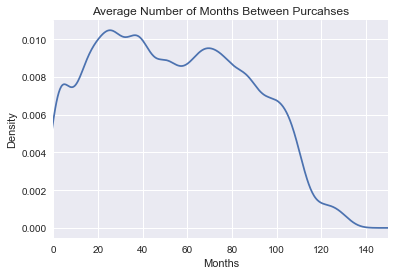

In [16]:
truncated_avg_months_customer.months_since_purchase.plot(kind='kde',xlim=[0,150])
plt.title('Average Number of Months Between Purcahses')
plt.xlabel('Months')

In [17]:
original_df.groupby(by=['customer_id'])['quarters_since_purchase'].mean().reset_index()['quarters_since_purchase'].plot(kind='kde',xlim=[0,40])
plt.title('Average Number Quarters Between Purchases')
plt.xlabel('Quarters')

KeyError: 'Column not found: quarters_since_purchase'

In [ ]:
original_df.groupby(by=['customer_id'])['years_since_purchase'].mean().reset_index()['years_since_purchase'].plot(kind='kde',xlim=[0,10])
plt.title('Average Number Years Between Purchases')
plt.xlabel('Years')

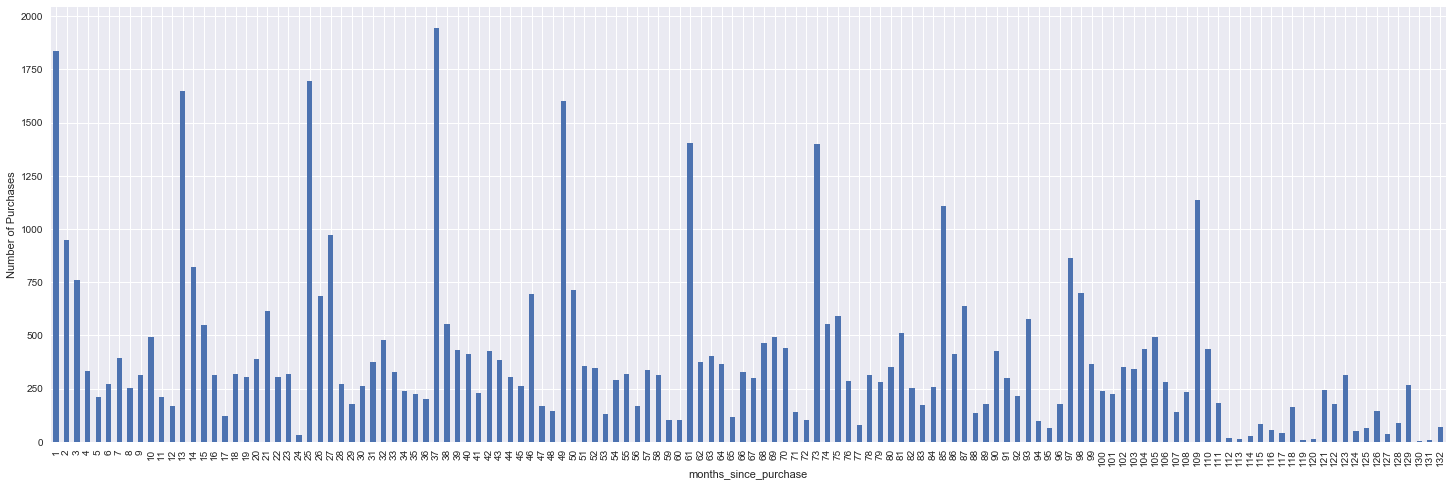

In [18]:
## Number of purchases per month total - not by unique customer id
original_df.groupby(by=['months_since_purchase']).count()['customer_id'].plot(kind='bar',figsize=([25,8]))
plt.ylabel('Number of Purchases')

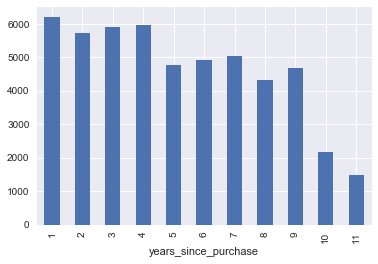

In [19]:
## Number of pruchases per year total - not by unique customer id
original_df.groupby(by=['years_since_purchase']).count()['customer_id'].plot(kind='bar')

In [20]:
cumulative_purchases_per_year = original_df.groupby(by=['years_since_purchase']).count()['customer_id'].apply(
lambda x: x/sum(original_df.groupby(by=['years_since_purchase']).count())).reset_index()

In [21]:
cumulative_purchases_per_year['running_total'] = cumulative_purchases_per_year.customer_id.cumsum()

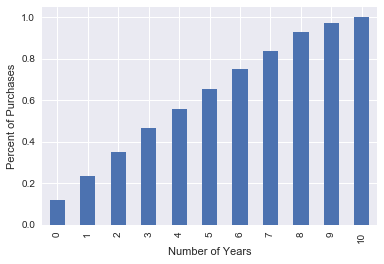

In [22]:
## Cumulative purchases over years

cumulative_purchases_per_year.running_total.plot(kind='bar')
plt.ylabel('Percent of Purchases')
plt.xlabel('Number of Years')

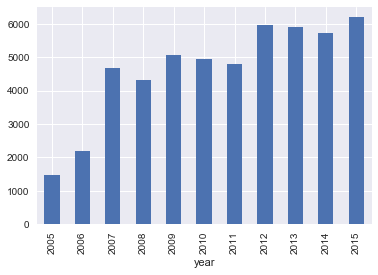

In [23]:
## Total number of purchases per year
original_df.groupby(['year']).count()['customer_id'].plot(kind='bar')

## Based on the above analysis, let us define a state as 36 months or three years (slightly less than the average time between transactions of ~50 months)
- Therefore, we will have three states in our transition matrix up to year nine (cutting out years 10 and 11)
- State One : <=3 years
- State Two : >3 years <= 6 years
- State Three : > 6 years <= 9 years

> Drop records that are 10 or 11 years since purchase

In [24]:
## drop these 
original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11,False,False,False
6,2620,30.0,2006-03-09,3,2006,3585 days,118,10,False,False,False
8,3120,150.0,2006-11-08,11,2006,3341 days,110,10,False,False,False
12,4000,20.0,2005-11-25,11,2005,3689 days,122,11,False,False,False
16,4840,30.0,2005-10-14,10,2005,3731 days,123,11,False,False,False
17,4910,15.0,2006-12-13,12,2006,3306 days,109,10,False,False,False
19,4970,30.0,2006-12-01,12,2006,3318 days,109,10,False,False,False
20,5250,50.0,2005-12-20,12,2005,3664 days,121,11,False,False,False
22,5990,30.0,2006-03-17,3,2006,3577 days,118,10,False,False,False
23,6240,100.0,2006-11-09,11,2006,3340 days,110,10,False,False,False


In [25]:
indexes_to_drop = original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)].index

In [26]:
indexes_to_drop

Int64Index([    2,     6,     8,    12,    16,    17,    19,    20,    22,
               23,
            ...
            51088, 51089, 51098, 51109, 51143, 51151, 51164, 51175, 51176,
            51186],
           dtype='int64', length=3652)

In [27]:
state_df = original_df.drop(original_df.index[indexes_to_drop])

In [28]:
## Confirm we dropped everything correctly
state_df[(state_df.state_one == False) &
            (state_df.state_two == False) &
                (state_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three


In [34]:
state_df.groupby(['customer_id']).apply(sort_index())

NameError: name 'sort_index' is not defined

In [30]:
state_df[state_df.customer_id==80]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
11457,80,80.0,2011-08-05,8,2011,1610 days,53,5,False,True,False
11657,80,80.0,2013-08-07,8,2013,877 days,29,3,True,False,False
15624,80,60.0,2007-04-18,4,2007,3180 days,105,9,False,False,True
16131,80,80.0,2015-01-23,1,2015,343 days,12,1,True,False,False
45074,80,80.0,2014-03-05,3,2014,667 days,22,2,True,False,False
46422,80,70.0,2009-04-10,4,2009,2457 days,81,7,False,False,True


In [31]:
unique_customer_id = state_df.customer_id.unique()
unique_customer_id[0]

760

In [32]:
## Check number of customers where state is in last state

number_in_state_one = 0
number_in_state_two = 0
number_in_state_three = 0
number_of_customers = len(unique_customer_id)

# get number in state one
for customer in unique_customer_id:
    if state_df.state_one[(state_df['customer_id']==customer)].any() == True:
        number_in_state_one +=1
    else:
        pass
# get number in state two
for customer in unique_customer_id:
    if state_df.state_two[(state_df['customer_id']==customer)].any() == True:
        number_in_state_two +=1
    else:
        pass
# get number of customer in state three

for customer in unique_customer_id:
    if state_df.state_three[(state_df['customer_id']==customer)].any() == True:
        number_in_state_three +=1
    else:
        pass

In [33]:
state_df.groupby(['customer_id','state_one','state_two']).count().reset_index()[]

SyntaxError: invalid syntax (<ipython-input-33-7ff603f73874>, line 1)

In [ ]:
number_in_state_one

In [ ]:
state_df.state_three[(state_df['customer_id']==80)]

In [ ]:
state_df.groupby('state_one').count()['customer_id']

In [ ]:
## determine state one to state one probability
state_df.groupby('state_one').count()['customer_id']